# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Load the Dataset

In [2]:
# Load DELL daily stock data
df = pd.read_csv('/content/DELL_daily_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-17,12.207997,12.348319,12.067676,12.067676,11.263914,271519
1,2016-08-18,12.348319,12.348319,11.927354,11.997515,11.198426,1767366
2,2016-08-19,11.983482,12.207997,11.969450,12.207997,11.394890,4735900
3,2016-08-22,12.067676,12.797349,11.955418,12.250094,11.434185,2245909
4,2016-08-23,12.278158,12.881542,12.207997,12.628963,11.787820,1483020


# 3. Clean and Explore the Data

In [3]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2065 non-null   object 
 1   Open       2065 non-null   float64
 2   High       2065 non-null   float64
 3   Low        2065 non-null   float64
 4   Close      2065 non-null   float64
 5   Adj Close  2065 non-null   float64
 6   Volume     2065 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.1+ KB


In [4]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'Date' to datetime format if available
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# 4. Visualize Stock Price

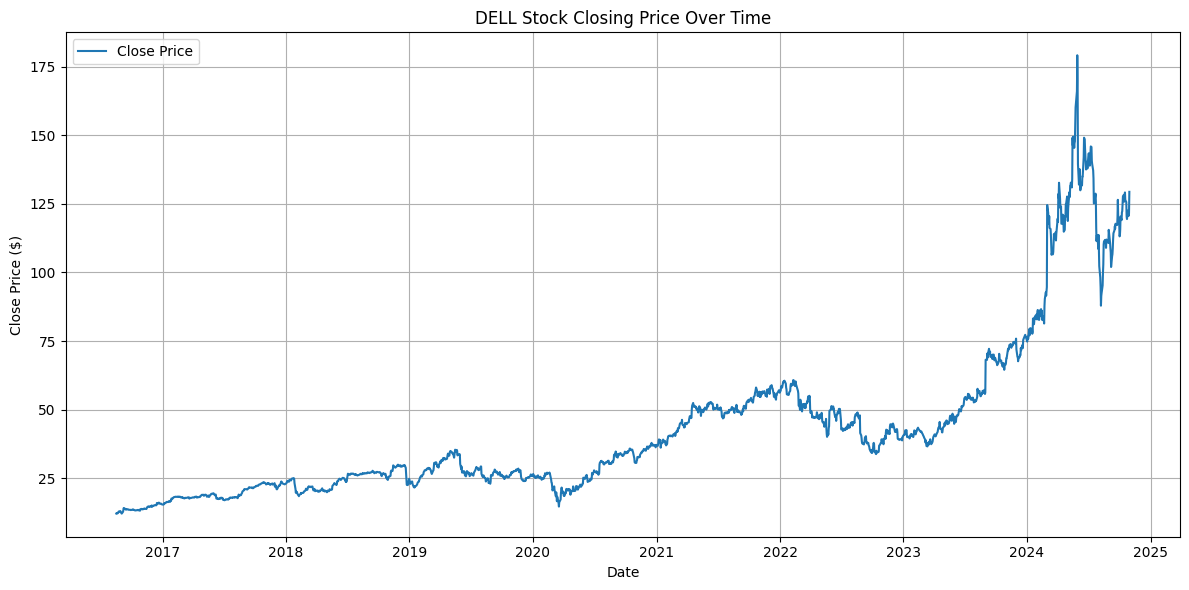

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('DELL Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Feature Selection

In [7]:
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Close']

# 6. Feature Scaling

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 8. Train Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 9. Model Evaluation

In [11]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
Mean Squared Error: 0.20
Root Mean Squared Error: 0.44
R² Score: 1.00


# 10. Actual vs Predicted Plot

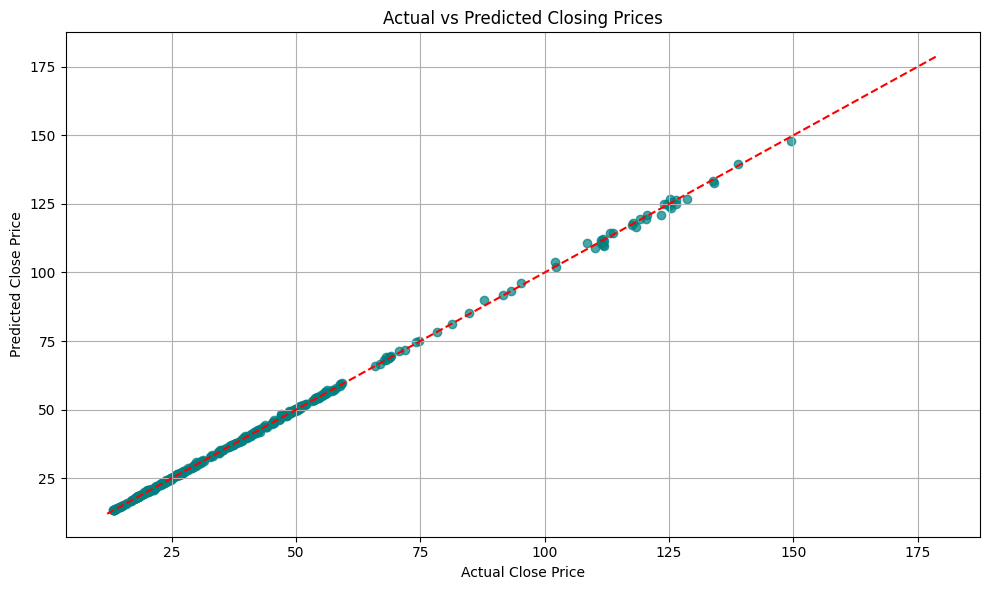

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Closing Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# List of features to plot against Close
features = ['Open', 'High', 'Low', 'Volume']

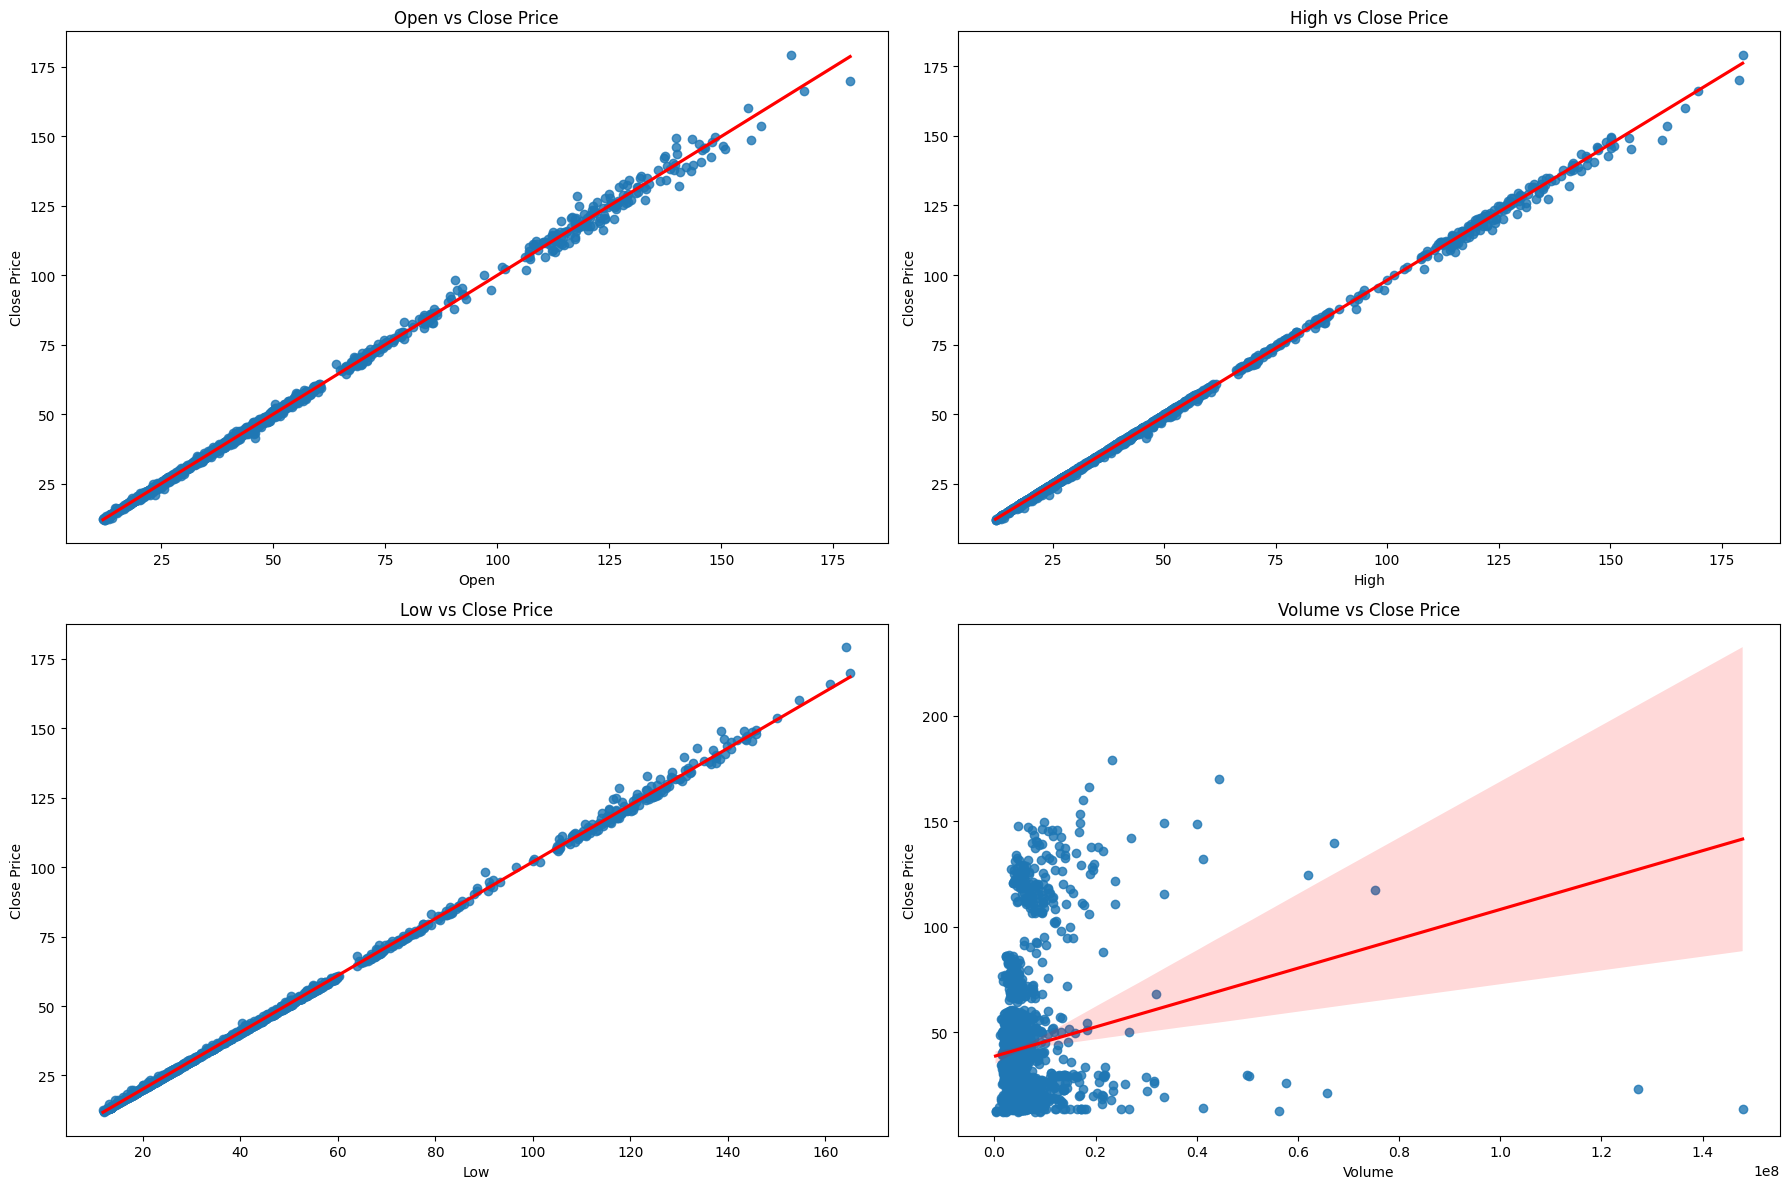

In [15]:
# Create scatter plots with regression lines
plt.figure(figsize=(18, 12))

for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)
    sns.regplot(x=df[feature], y=df['Close'], line_kws={"color": "red"})
    plt.title(f"{feature} vs Close Price")
    plt.xlabel(feature)
    plt.ylabel("Close Price")

plt.tight_layout()
plt.show()

# 11. Plot Residuals

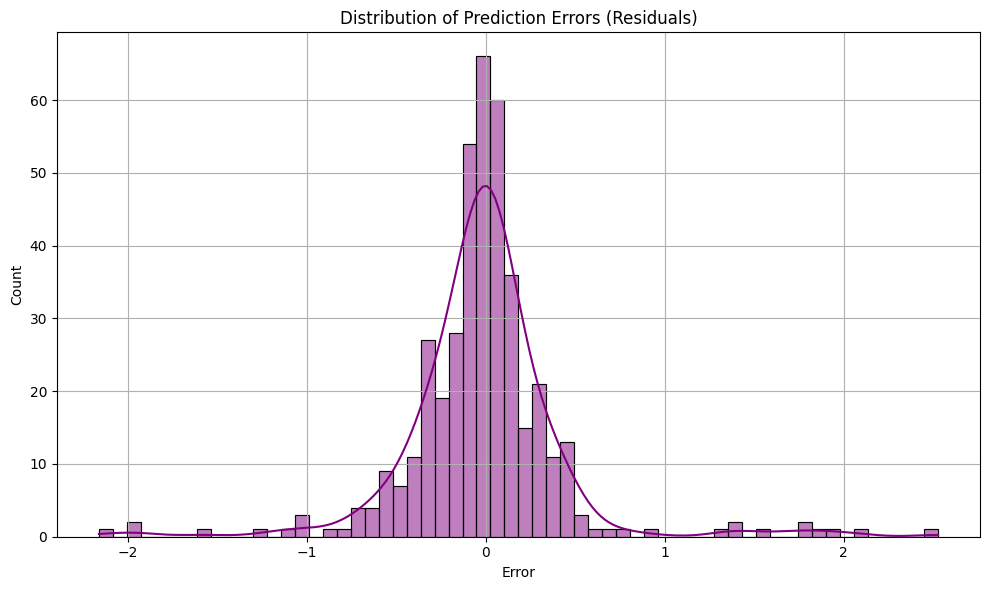

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()